How many books do not have an original title [books.csv]?

In [2]:
import pandas as pd

df = pd.read_csv('books.csv')
#df.head()

# Count the number of rows where the 'original_title' column is empty or missing
books_without_original_title = df['original_title'].isnull().sum()

print(f'The number of books without an original title is: {books_without_original_title}')


The number of books without an original title is: 36


How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [5]:
import pandas as pd

# Load books.csv
books_df = pd.read_csv('books.csv')

# Remove records with null values in the 'original_title' column
books_df = books_df.dropna(subset=['original_title'])

# Extract unique book_ids from the cleaned books_df
unique_books = set(books_df['book_id'])

# Load book_tags.csv
book_tags_df = pd.read_csv('book_tags.csv')

# Filter book_tags_df to include only records with book_ids present in unique_books
book_tags_df = book_tags_df[book_tags_df['goodreads_book_id'].isin(unique_books)]

# Load ratings.csv
ratings_df = pd.read_csv('ratings.csv')

# Filter ratings_df to include only records with book_ids present in unique_books
ratings_df = ratings_df[ratings_df['book_id'].isin(unique_books)]

# Get the number of unique books after filtering
num_unique_books = len(unique_books)

print(f'The number of unique books in the dataset after removing records with null values in the original_title column is: {num_unique_books}')


The number of unique books in the dataset after removing records with null values in the original_title column is: 363


How many unique users are present in the dataset [ratings.csv] ?

In [6]:
import pandas as pd

# Load ratings.csv
ratings_df = pd.read_csv('ratings.csv')

# Get the number of unique users
num_unique_users = ratings_df['user_id'].nunique()

print(f'The number of unique users in the ratings dataset is: {num_unique_users}')


The number of unique users in the ratings dataset is: 40836


How many unique tags are there in the dataset [book_tags.csv] ?

In [7]:
import pandas as pd

# Load book_tags.csv
book_tags_df = pd.read_csv('book_tags.csv')

# Get the number of unique tags
num_unique_tags = book_tags_df['tag_id'].nunique()

print(f'The number of unique tags in the book_tags dataset is: {num_unique_tags}')


The number of unique tags in the book_tags dataset is: 3651


Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [8]:
import pandas as pd

# Load book_tags.csv
book_tags_df = pd.read_csv('book_tags.csv')

# Find the most frequently used tag_id
most_used_tag_id = book_tags_df.groupby('tag_id').size().idxmax()

print(f'The tag_id that is most frequently used (mapped with the highest number of books) is: {most_used_tag_id}')


The tag_id that is most frequently used (mapped with the highest number of books) is: 4600


Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [9]:
import pandas as pd

# Load book_tags.csv and books.csv
book_tags_df = pd.read_csv('book_tags.csv')
books_df = pd.read_csv('books.csv')

# Merge book_tags_df with books_df to get book titles
merged_df = pd.merge(book_tags_df, books_df[['book_id', 'title']], left_on='goodreads_book_id', right_on='book_id')

# Find the book title with the most number of counts of tags
most_tagged_book_title = merged_df.groupby('title')['count'].sum().idxmax()

print(f'The book with the most number of counts of tags is: {most_tagged_book_title}')


The book with the most number of counts of tags is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

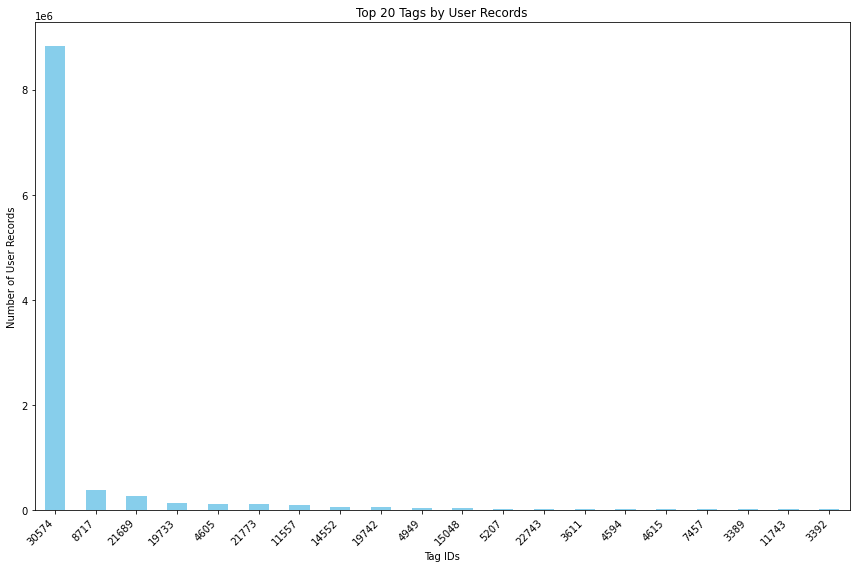

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load book_tags.csv
book_tags_df = pd.read_csv('book_tags.csv')

# Calculate the number of user records for each tag_id
tag_user_records = book_tags_df.groupby('tag_id')['count'].sum()

# Sort the tags by the number of user records in descending order and take the top 20
top_tags = tag_user_records.sort_values(ascending=False).head(20)

# Plot the bar chart using the index and values directly
plt.figure(figsize=(12, 8))
top_tags.plot(kind='bar', color='skyblue')
plt.xlabel('Tag IDs')
plt.ylabel('Number of User Records')
plt.title('Top 20 Tags by User Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
